In [1]:
import assignment.load as load
import assignment.display as display
import matplotlib.pyplot as plt
from matplotlib.cm import gray
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [3]:
from assignment.classify import WeightedKNearestNeighbour
from assignment.dimensionality import PCAReducer, BorderTrimReducer, BestKSelector, DropFirstNSelector
from assignment.pipeline import Pipeline

nn_fuzzy = lambda: WeightedKNearestNeighbour(k=1, fuzzy=True)
nn_not_fuzzy = lambda: WeightedKNearestNeighbour(k=1, fuzzy=False)

pipeline1 = Pipeline(nn_fuzzy(), [BorderTrimReducer(0, 4, 0, 3), PCAReducer(11), DropFirstNSelector(1)])
pipeline1.train(data._raw_data['train_data'], data._raw_data['train_labels'])
pipeline2 = Pipeline(nn_fuzzy(), [BorderTrimReducer(0, 4, 0, 3), PCAReducer(12), DropFirstNSelector(2)])
pipeline2.train(data._raw_data['train_data'], data._raw_data['train_labels'])

In [4]:
# raise Exception()

In [5]:
import numpy as np

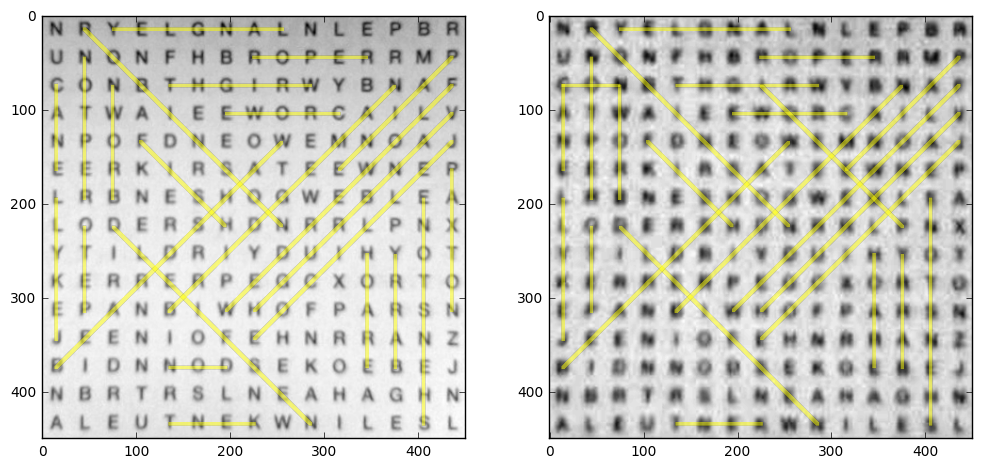

In [6]:
def show_wordsearches(pipeline):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 2, 1)
    data.wordsearch1.classify(pipeline)
    data.wordsearch1.show_solved(rad=2)

    plt.subplot(1, 2, 2)
    data.wordsearch2.classify(pipeline)
    data.wordsearch2.show_solved(rad=2)
show_wordsearches(pipeline1)

In [7]:
data.wordsearch1.classify(pipeline1)
p = data.wordsearch1.correctness_score(only_score=False)

data.wordsearch2.classify(pipeline1)
q = data.wordsearch2.correctness_score(only_score=False)
(p, q)

((24, {}),
 (22,
  {'don': (((6, 12), (2, 11)), ((0, 2), (2, 1))),
   'paxton': (((14, 5), (13, 10)), ((12, 7), (5, 0)))}))

In [8]:
data.wordsearch1.classify(pipeline1)
p = data.wordsearch1.correctness_score(only_score=False)

data.wordsearch1.classify(pipeline2)
q = data.wordsearch1.correctness_score(only_score=False)
(p, q)

((24, {}), (24, {}))

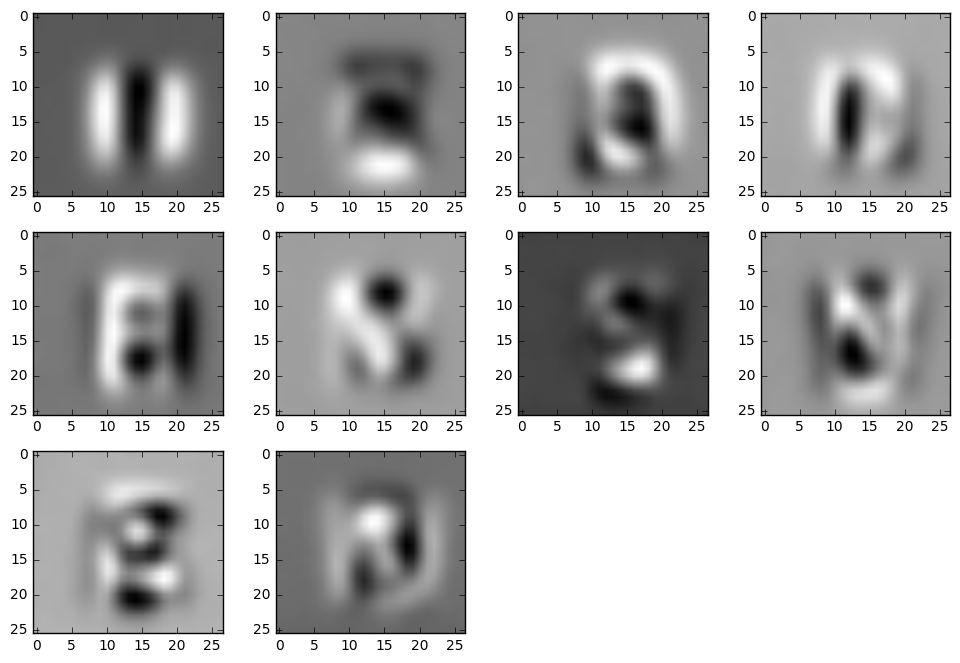

In [9]:
from assignment.data import Letter
from math import sqrt, floor, ceil

plt.figure(figsize=(12, 8))
eigenvectors = pipeline1._reducers[1]._eigenvectors.transpose()

# selected = pipeline1._reducers[1]._best_k
selected = np.array(range(1, 11))

eigenvectors = eigenvectors[selected]

height = floor(sqrt(eigenvectors.shape[0]))
width = ceil(eigenvectors.shape[0] / height)
i = 0
for eigenvector in eigenvectors:
    i += 1
    plt.subplot(height, width, i)
    display.show_image(eigenvector, (26, 27))